# Logistic Regression with Word2Vec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import TimeSeriesSplit
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import naive_bayes
from sklearn.metrics import classification_report,confusion_matrix
import nltk

C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
final_data=pd.read_csv('Amazon.csv')

# Sort the Data Based on the TimeStamp

In [3]:
final_data.sort_values('Time',ascending=True)
final_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


# Spliting the whole Dataset into Train and Test

In [4]:
tscv=TimeSeriesSplit(n_splits=2)
for train_index,test_index in tscv.split(final_data):
    print("Train:", train_index,"Test:", test_index)
    train_data,test_data = final_data.iloc[train_index],final_data.iloc[test_index]

Train: [     0      1      2 ..., 121388 121389 121390] Test: [121391 121392 121393 ..., 242778 242779 242780]
Train: [     0      1      2 ..., 242778 242779 242780] Test: [242781 242782 242783 ..., 364168 364169 364170]


In [5]:
reviews=train_data['Score']
reviews=reviews[0:70000]
test_review=test_data['Score']
test_review=test_review[0:30000]

In [6]:
train_data=train_data[0:70000]
test_data=test_data[0:30000]

# Converting Train and Test data into Wordtovec

In [7]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'d', 'you', "hasn't", 'y', 'hadn', 'couldn', 'with', 'their', 'because', "don't", 'should', 'any', 'than', 's', 'once', "didn't", "you're", 'while', 'm', 'ourselves', "needn't", 'how', 'i', 'over', 'not', 'for', 'into', "mustn't", 'those', 'has', 'wasn', 'he', 'having', 'against', 'on', 'who', 'these', 'in', 'mightn', 'now', 'yourself', 't', 'all', "it's", 'am', 'through', 'they', 'your', 'at', 'no', 'few', 'didn', 'our', 'own', "wasn't", 'and', "wouldn't", 'shouldn', "she's", 'but', 'of', 'doesn', 'o', 'other', "doesn't", 'she', "haven't", 'during', 'when', 'hers', 'him', 'why', 'itself', "you've", 'very', "you'll", 'some', 'can', 'we', 'off', 'between', 'out', 'by', 'too', 'up', 'been', 'there', 'here', 'more', 'under', 'it', 'do', 'her', 'theirs', 'll', "couldn't", 'myself', 'mustn', 'his', 'a', 'won', 'hasn', 'being', 'whom', 'such', "isn't", 'themselves', "aren't", 'so', 'haven', 'about', "should've", 'isn', 'ma', 'as', 'shan', 'where', 'herself', 'which', 'each', 'only', 'yourse

In [8]:
import gensim
i=0
list_of_sent_train=[]
for sent in train_data['CleanText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
import gensim
i=0
list_of_sent_test=[]
for sent in test_data['CleanText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_test.append(filtered_sentence)

In [10]:
w2v_model_train=gensim.models.Word2Vec(list_of_sent_train,min_count=5,size=50,workers=4)
w2v_model_test=gensim.models.Word2Vec(list_of_sent_test,min_count=5,size=50,workers=4)

In [11]:
sent_vectors_train=[]
for sent in list_of_sent_train:
    sent_vec=np.zeros(50)
    #print(sent_vec)
    cnt_words=0;
    for word in sent:
        try:
            vec=w2v_model_train.wv[word]
            #print(vec)
            sent_vec+=vec
            cnt_words+=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))      

C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


70000
50


In [12]:
sent_vectors_train_array=np.array(sent_vectors_train)
sent_vectors_train_array=np.nan_to_num(sent_vectors_train_array)

In [13]:
sent_vectors_train_array

array([[ 0.07322952,  0.61471601, -0.08706193, ..., -0.19974772,
        -0.37102963, -0.01206013],
       [-0.02101613,  0.41192808, -0.28261963, ...,  0.41364799,
        -0.21633034, -0.19892195],
       [-0.33255795,  0.63386072,  0.42577745, ..., -0.52562621,
        -0.96974988, -0.12278519],
       ..., 
       [ 0.1359285 , -0.35825762,  0.24642475, ...,  0.06922256,
        -0.21248813,  0.5731297 ],
       [-0.12357033, -0.15386002,  0.19462777, ...,  0.48647623,
        -0.06379761,  0.58194895],
       [-0.06541241, -0.21950984,  0.37188654, ...,  0.21141138,
        -0.26155199,  0.74506407]])

In [14]:
sent_vectors_test=[]
for sent in list_of_sent_test:
    sent_vec=np.zeros(50)
    #print(sent_vec)
    cnt_words=0;
    for word in sent:
        try:
            vec=w2v_model_test.wv[word]
            #print(vec)
            sent_vec+=vec
            cnt_words+=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))      

C:\Users\RAJAN SHRIVASTAVA\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


30000
50


In [15]:
sent_vectors_test_array=np.array(sent_vectors_test)
sent_vectors_test_array=np.nan_to_num(sent_vectors_test_array)

# Data Preprocessing and Standardization the Train and Test Data

In [16]:
from sklearn.preprocessing import StandardScaler
standard_train_data=StandardScaler(copy=True,with_mean=False,with_std=True).fit_transform(sent_vectors_train_array)
print(standard_train_data.shape)

(70000, 50)


In [17]:
from sklearn.preprocessing import StandardScaler
standard_test_data=StandardScaler(copy=True,with_mean=False,with_std=True).fit_transform(sent_vectors_test_array)
print(standard_test_data.shape)

(30000, 50)


# Find the optimal value of the alpha using GridSearch

In [18]:
tuned_parameter=[{'C':[10**-4,10**-3, 10**-2, 10**0, 10**2,10**3,10**4]}] 
model=GridSearchCV(LogisticRegression(),tuned_parameter,scoring='f1',cv=5,refit=True)
model.fit(standard_train_data,reviews)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [19]:
print(model.best_score_)

0.935881268803681


In [20]:
print(model.best_params_)

{'C': 1}


In [21]:
print(model.grid_scores_)

[mean: 0.92550, std: 0.00058, params: {'C': 0.0001}, mean: 0.93450, std: 0.00166, params: {'C': 0.001}, mean: 0.93576, std: 0.00216, params: {'C': 0.01}, mean: 0.93588, std: 0.00214, params: {'C': 1}, mean: 0.93586, std: 0.00211, params: {'C': 100}, mean: 0.93587, std: 0.00213, params: {'C': 1000}, mean: 0.93587, std: 0.00213, params: {'C': 10000}]


# Let's find the optimal value of the lambda using RandomSearchCV

In [22]:
tuned_parameter_ran={'C':sp_rand()} 
model_ran=RandomizedSearchCV(LogisticRegression(),tuned_parameter_ran,scoring='f1',cv=5,n_iter=100)

In [23]:
model_ran.fit(standard_train_data,reviews)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018A997826D8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='f1', verbose=0)

In [24]:
print(model_ran.best_params_)

{'C': 0.17366298009280356}


In [25]:
print(model_ran.best_estimator_)

LogisticRegression(C=0.17366298009280356, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [26]:
print(model_ran.best_score_)

0.9359901487387985


# Apply Logistic Regression using L1 Regularization having Best Parameter from GridSearch

In [27]:
lr=LogisticRegression(penalty='l1',C=0.001)
lr.fit(standard_train_data,reviews)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Prediction and Evaluation

In [28]:
prediction=lr.predict(standard_test_data)
print(classification_report(test_review,prediction))

             precision    recall  f1-score   support

          0       0.40      0.49      0.44      5026
          1       0.89      0.85      0.87     24974

avg / total       0.81      0.79      0.80     30000



In [29]:
confu_metric=confusion_matrix(test_review,prediction)
print(confu_metric)

[[ 2473  2553]
 [ 3783 21191]]


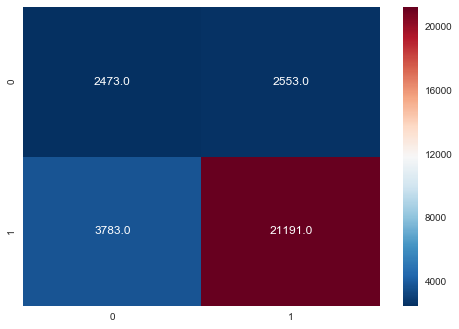

In [30]:
sns.heatmap(confu_metric,annot=True,fmt='.1f',cmap='RdBu_r')
plt.show()

# Train and Test Metric  of L1 Regularizer with GridSearch

In [31]:
TP=confu_metric[1][1]
FP=confu_metric[0][1]
TN=confu_metric[0][0]
FN=confu_metric[1][0]

In [32]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.848522463362
FPR:  0.507958615201
Specificity:  0.492041384799
Precision:  0.89247809973
Recall:  0.848522463362
F1Score:  0.869945400057


# ROC Curve

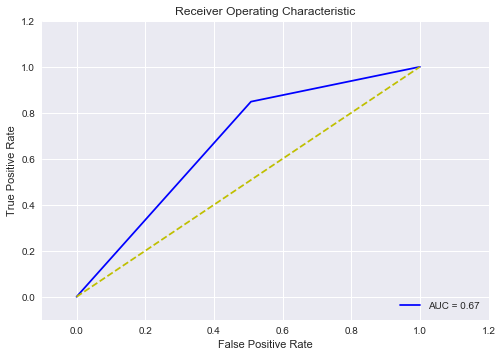

In [33]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Apply Logistic Regression using L1 Regularization having Best Parameter from RandomSearch

In [34]:
lr_random=LogisticRegression(penalty='l1',C= 0.00035229670982006578)
lr_random.fit(standard_train_data,reviews)

LogisticRegression(C=0.0003522967098200658, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Prediction and Evaluation while Using RandomSearch

In [35]:
prediction_lr=lr_random.predict(standard_test_data)
print(classification_report(test_review,prediction_lr))

             precision    recall  f1-score   support

          0       0.31      0.35      0.33      5026
          1       0.87      0.85      0.86     24974

avg / total       0.77      0.76      0.77     30000



In [36]:
confu_metric_lr=confusion_matrix(test_review,prediction_lr)
print(confu_metric_lr)

[[ 1740  3286]
 [ 3825 21149]]


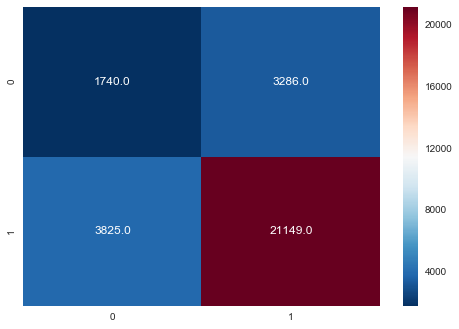

In [37]:
sns.heatmap(confu_metric_lr,annot=True,fmt='.1f',cmap='RdBu_r')
plt.show()

# Test and Train Metric L1 Reularization using RandomSearch

In [38]:
TP=confu_metric_lr[1][1]
FP=confu_metric_lr[0][1]
TN=confu_metric_lr[0][0]
FN=confu_metric_lr[1][0]

In [39]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.846840714343
FPR:  0.653800238758
Specificity:  0.346199761242
Precision:  0.865520769388
Recall:  0.846840714343
F1Score:  0.856078852031


# ROC Curve

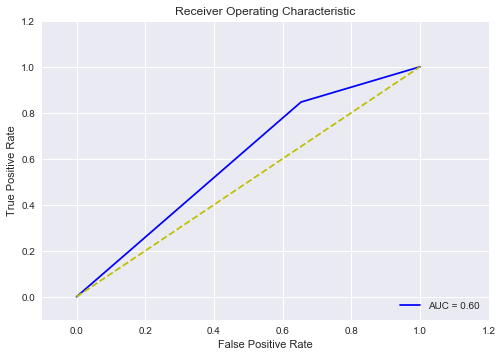

In [40]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_lr)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Apply Logistic Regression using L2 Regularization having Best Parameter from GridSearch

In [41]:
lr2=LogisticRegression(penalty='l2',C=0.0001)
lr2.fit(standard_train_data,reviews)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
lr2.coef_

array([[-0.05322756,  0.23696541,  0.07583722,  0.13175445, -0.18572041,
        -0.05255542,  0.06747291, -0.25208956, -0.13184468,  0.03542648,
        -0.08574955,  0.08956251,  0.06418924,  0.00308173, -0.05613576,
        -0.03546571,  0.04723115,  0.10101448, -0.10132434, -0.11546401,
         0.00698254, -0.18093706,  0.01794146, -0.13652772,  0.09282835,
        -0.04161765, -0.10703876, -0.15272615,  0.04024261,  0.00558418,
        -0.08271771,  0.08679817, -0.04647467, -0.03054623, -0.07909467,
         0.15251214, -0.09101526,  0.13207189, -0.0733356 ,  0.12611196,
         0.08731606, -0.03559649,  0.09813277, -0.11370034,  0.01805967,
         0.04980916,  0.04579341, -0.0082971 , -0.15734978,  0.13183898]])

# Prediction and Evaluation 

In [43]:
prediction_lr2=lr2.predict(standard_test_data)
print(classification_report(test_review,prediction_lr2))

             precision    recall  f1-score   support

          0       0.66      0.20      0.30      5026
          1       0.86      0.98      0.91     24974

avg / total       0.82      0.85      0.81     30000



In [44]:
confu_metric_lr2=confusion_matrix(test_review,prediction_lr2)
print(confu_metric_lr2)

[[  985  4041]
 [  513 24461]]


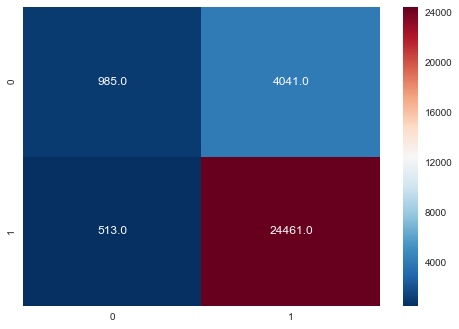

In [45]:
sns.heatmap(confu_metric_lr2,annot=True,fmt='.1f',cmap='RdBu_r')
plt.show()

# Test and Train Metric Using GridSearch and L2 Regularization

In [46]:
TP=confu_metric_lr2[1][1]
FP=confu_metric_lr2[0][1]
TN=confu_metric_lr2[0][0]
FN=confu_metric_lr2[1][0]

In [47]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.979458636982
FPR:  0.804019100676
Specificity:  0.195980899324
Precision:  0.858220475756
Recall:  0.979458636982
F1Score:  0.914840302192


# ROC Curve

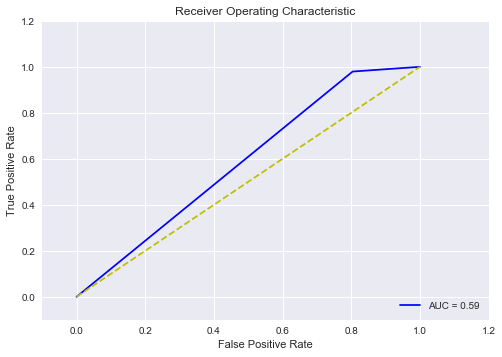

In [48]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_lr2)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Apply Logistic Regression using L2 Regularization having Best Parameter from RandomSearch

In [49]:
lr2_random=LogisticRegression(penalty='l2',C= 0.00035229670982006578)
lr2_random.fit(standard_train_data,reviews)

LogisticRegression(C=0.0003522967098200658, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
prediction_2=lr2_random.predict(standard_test_data)
print(classification_report(test_review,prediction_2))

             precision    recall  f1-score   support

          0       0.55      0.37      0.44      5026
          1       0.88      0.94      0.91     24974

avg / total       0.82      0.84      0.83     30000



In [51]:
confu_metric_lrr2=confusion_matrix(test_review,prediction_2)
print(confu_metric_lrr2)

[[ 1844  3182]
 [ 1524 23450]]


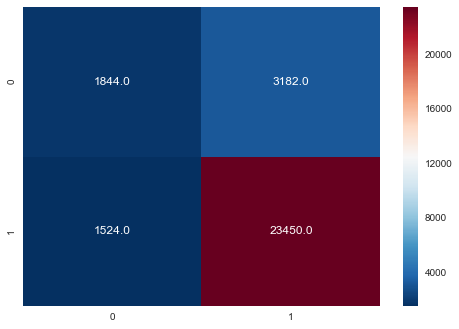

In [52]:
sns.heatmap(confu_metric_lrr2,annot=True,fmt='.1f',cmap='RdBu_r')
plt.show()

# Test and Train Metric Using L2 and RandomSearch

In [53]:
TP=confu_metric_lrr2[1][1]
FP=confu_metric_lrr2[0][1]
TN=confu_metric_lrr2[0][0]
FN=confu_metric_lrr2[1][0]

In [54]:
True_positive_rate=TP/(TP+FN) #It tells us when it is actually a Positive Review , How often does it predict Postive Review
print('TPR: ',True_positive_rate)

false_positive_rate=FP/(FP+TN) # It tells us that when the review is negative how often does it predict Positive Review
print('FPR: ',false_positive_rate)

specificity=TN/(TN+FP) #It tells us that When the review is negative ,how often does it predict negative review
print('Specificity: ',specificity)

precision=TP/(TP+FP) # It tells us all the reviews that model has predicted to be Positive how many are truly positive 
print('Precision: ',precision)

recall=TP/(TP+FN) # It tells us that from all the predicted postive reviews how many are actually postive review
print('Recall: ',recall)

f1_score=2*precision*recall/(precision+recall) #It is the weighted average of the Precision and Recall
print('F1Score: ',f1_score)

TPR:  0.938976535597
FPR:  0.633107839236
Specificity:  0.366892160764
Precision:  0.880519675578
Recall:  0.938976535597
F1Score:  0.908809053211


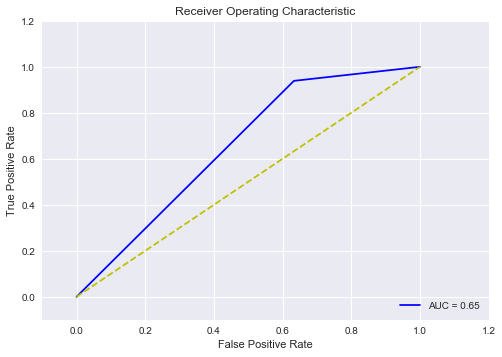

In [55]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(test_review,prediction_2)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Checking the Sparsity with the increasing value of the lambda

In [56]:
C_param_range = [0.001,0.01,0.1,0.5,1,5,10]
for j in C_param_range:
    lr=LogisticRegression(penalty='l1',C=j,random_state=0)
    lr.fit(standard_train_data,reviews)
    w=lr.coef_
    print(np.count_nonzero(w))

25
43
48
50
50
50
50


# Checking the Misclassification eroror as the lambda increases

The MSE on the different value of C [0.12877149644358643, 0.11441419944599074, 0.11292845352157388, 0.11261416882645714, 0.11274274229613646]


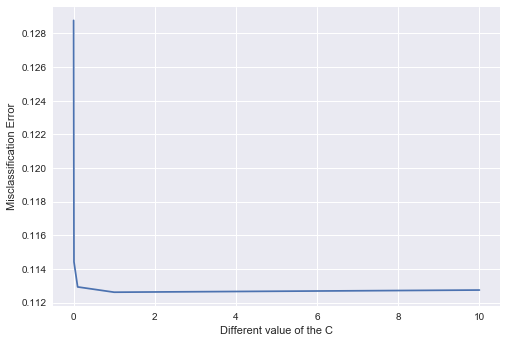

In [57]:
C_param_range = [0.001,0.01,0.1,1,10]
cv_score=[]
for j in C_param_range:
    lr=LogisticRegression(penalty='l1',C=j,random_state=0)
    scores=cross_val_score(lr,standard_train_data,reviews,cv=5,).mean()
    cv_score.append(scores)
    
# changing to misclassification error
MSE = [1 - x for x in cv_score]
print('The MSE on the different value of C', MSE)
plt.plot(C_param_range,MSE)
plt.xlabel('Different value of the C')
plt.ylabel('Misclassification Error')
plt.show()

# Feature Selection and Checking the Multicollinearity

# Adding the random Noise to the datasets

In [58]:
noise=np.random.normal(0,0.01,size=(70000,50))

In [59]:
noise

array([[ 0.00978937, -0.0018346 , -0.00557897, ..., -0.00598035,
        -0.01578282, -0.01173944],
       [-0.0063968 ,  0.00672159,  0.00817754, ..., -0.01766219,
         0.00672777,  0.02151305],
       [-0.0123958 ,  0.01420691,  0.00580587, ...,  0.00431902,
         0.01028008, -0.01347628],
       ..., 
       [-0.01073996, -0.00702361, -0.0082134 , ..., -0.02051757,
        -0.00677702,  0.00286666],
       [ 0.0268767 ,  0.00524356, -0.01683343, ..., -0.00158921,
        -0.01421566, -0.0126937 ],
       [-0.00061251,  0.00274406, -0.0015496 , ..., -0.00881496,
         0.00872747, -0.00660883]])

In [60]:
standard_train_data_noise=standard_train_data + noise
print(standard_train_data_noise)

[[ 0.15853739  1.49659088 -0.19370381 ..., -0.47729625 -0.86983212
  -0.0414905 ]
 [-0.04908599  1.01083328 -0.60251157 ...,  0.95836334 -0.49122917
  -0.46920655]
 [-0.68790665  1.55929935  0.92583273 ..., -1.23592536 -2.22192496
  -0.31637449]
 ..., 
 [ 0.26536584 -0.88030873  0.52426522 ...,  0.14281693 -0.49588981
   1.41671755]
 [-0.22412646 -0.36980406  0.40372144 ...,  1.14627861 -0.16106729
   1.42291336]
 [-0.13348196 -0.5323309   0.8020289  ...,  0.490022   -0.59332228
   1.83138614]]


In [61]:
lr3=LogisticRegression(penalty='l2',C=0.0001)
lr3.fit(standard_train_data_noise,reviews)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Prediction and Evaluation by Adding a Random Noise to the training DATA

In [62]:
prediction_l2_noise=lr3.predict(standard_test_data)
print(classification_report(test_review,prediction_l2_noise))

             precision    recall  f1-score   support

          0       0.66      0.20      0.30      5026
          1       0.86      0.98      0.91     24974

avg / total       0.82      0.85      0.81     30000



In [63]:
confu_noise=confusion_matrix(test_review,prediction_l2_noise)

In [64]:
print(confu_noise)

[[  985  4041]
 [  513 24461]]


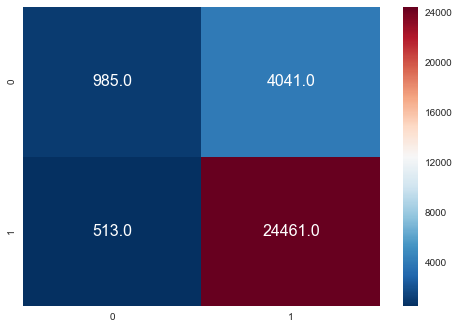

In [65]:
sns.heatmap(confu_noise,annot=True,fmt='.1f',annot_kws={"size": 16},cmap='RdBu_r')
plt.show()

In [66]:
w_hat=lr3.coef_

In [67]:
w_hat=np.array(w_hat)
print(w_hat)

[[-0.0532369   0.23697096  0.07576985  0.13176432 -0.18566136 -0.05255601
   0.06745009 -0.25203579 -0.13184458  0.03544504 -0.08576252  0.08965055
   0.06424199  0.00305908 -0.05601289 -0.03544742  0.04726199  0.10101375
  -0.10122801 -0.11541386  0.00695438 -0.18088524  0.0179442  -0.13657968
   0.09282423 -0.04161638 -0.10703414 -0.15273176  0.04026481  0.0055559
  -0.08274284  0.08672029 -0.04649774 -0.03045322 -0.07908103  0.15252495
  -0.09108113  0.13216346 -0.07324092  0.12609133  0.08736914 -0.03562218
   0.09811667 -0.11376978  0.01801916  0.04974259  0.04576786 -0.00824233
  -0.15723881  0.13187205]]


In [68]:
w_old=lr2.coef_
w_old=np.array(w_old)
print(w_old)

[[-0.05322756  0.23696541  0.07583722  0.13175445 -0.18572041 -0.05255542
   0.06747291 -0.25208956 -0.13184468  0.03542648 -0.08574955  0.08956251
   0.06418924  0.00308173 -0.05613576 -0.03546571  0.04723115  0.10101448
  -0.10132434 -0.11546401  0.00698254 -0.18093706  0.01794146 -0.13652772
   0.09282835 -0.04161765 -0.10703876 -0.15272615  0.04024261  0.00558418
  -0.08271771  0.08679817 -0.04647467 -0.03054623 -0.07909467  0.15251214
  -0.09101526  0.13207189 -0.0733356   0.12611196  0.08731606 -0.03559649
   0.09813277 -0.11370034  0.01805967  0.04980916  0.04579341 -0.0082971
  -0.15734978  0.13183898]]


# Find the difference in both weight vectors before and after Noise

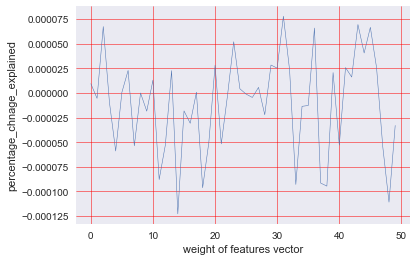

In [69]:
diff=[]
for i in range(w_hat.size):
    diff.append(w_old[:,i] - w_hat[:,i])

plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(diff,linewidth=0.5)
plt.axis('tight')
plt.grid(color='r',linewidth=0.5,linestyle='-')
plt.xlabel('weight of features vector')
plt.ylabel('percentage_chnage_explained')
plt.show()   

# Observation : We have calculated the weight vector after adding the noise and what i have found that , there is almost no chnage in the new and old weight vector so we can say that they are not multicollinear

In [70]:
percentage_var_explained=diff / np.sum(diff)
percenatge_change=np.cumsum(percentage_var_explained)

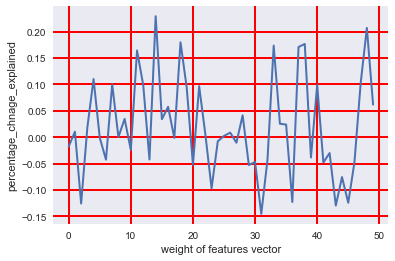

In [71]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(percentage_var_explained,linewidth=2)
plt.axis('tight')
plt.grid(color='r',linewidth=2,linestyle='-')
plt.xlabel('weight of features vector')
plt.ylabel('percentage_chnage_explained')
plt.show()

# Finding top ten important features in Training data

In [72]:
w_old[0][0:10]

array([-0.05322756,  0.23696541,  0.07583722,  0.13175445, -0.18572041,
       -0.05255542,  0.06747291, -0.25208956, -0.13184468,  0.03542648])

# Observation/Summary 

1.I have preprocessed and cleaned  the whole dataset and store in Amazon.csv file for the further use. That CSV contains all the data. 
2. Now We have cleaned data , So I have sorted the Whole data on the basic of the TimeStamp
3. Now I have splitted my whole Dataset into Training and Test datasets for My ML
4. I have taken the 70K sample from the Training purpose and 30K Sample for Testing purpose
5. Its time to convert our text into vectors . I have used Word2vec() to convert my text reviews into Vectors . 
   I have converted the Training Sample and Test sample individually

6. I have performed the column Standardization on my Training and Test data
7. I have tuned my gridSearch  With different parameter to find out the best parameter and best score. 
8. I have also tuned my random search to find out the best parameter and score. They are listed below


In [75]:
pd.DataFrame({'GridSearch':[0.9359,1],'RandomSearch':[0.9359,0.173666]},index=['Best_score','Best_parameter'])

,GridSearch,RandomSearch
Best_score,0.9359,0.935900
Best_parameter,1.0000,0.173666


8. We have the best Parameter.Now I have applied the Logistic Regression Using L1 and L2 Regularizer, taken the best parameter      got from the GridSearch. 

9. We have the best Parameter.Now I have applied the Logistic Regression Using L1 and L2 Regularizer, taken the best parameter      got from the RandomSearch. 
10. I have evaluated the Each one , In my case , The result I have got from the L2 regularization irrespective of GridSearch and     Random Search  is much better than in case of L1 regularization. 
11. I kept increasing the value of the lambda , and I have found that my misclassification error was kept on decreasing but at a     very high value lambda =1000 My misclassification error again increased  
12. As I have increased the lamda value to check the sparsity with a high value of lambda our mostly elements are zero as we        have decreased the lambda the sparsity decreased and We have got more non zero rows

13. Now I have checked the Multicollinearity, I have created a random noise of the same length as My datasets is . Now I have       remove the non zero rows to maintain the sparsity , Now I have added the Noise to the training dataset,I have my training       datasets with noise. 
14. Now I have applied by noise dataset to the logistic regression , Now I have calculated the new weight W_hat.
    What I have done , I have find the differnce between the w and w_hat, and plot it .
    In my case , most of the weight has not changed. there is hardly .02% change in the weight. So we can say that my features       are not Multicollinear. We have found the top ten features from the w 
    

    
